In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import contextily as ctx


In [6]:
polys = gpd.read_file('data/sz/shenzhen_census_community.shp',encoding = 'gb18030')


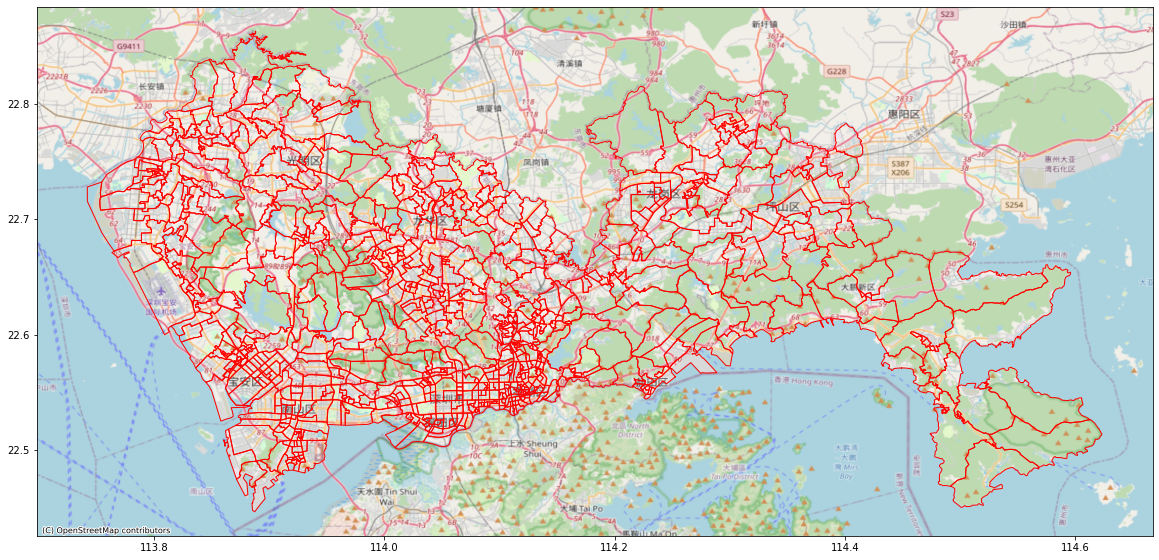

In [20]:
fig, ax = plt.subplots (figsize = (20,25))
polys.plot(ax=ax, figsize = (20,25), facecolor = "None", edgecolor = "r")
ctx.add_basemap(ax, crs=polys.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [8]:
polys.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
polys.info

<bound method DataFrame.info of        社区     合计    Shape_Leng    Shape_Area  class2  \
0     大塘龙   4944   2228.330477  1.752325e+05       0   
1     桂木园   7481   1838.177395  1.290793e+05       0   
2     人民桥   4141   3151.763439  2.999622e+05       1   
3      红岭   8138   1605.644623  1.405184e+05       1   
4      红南   6738   2429.912110  2.210981e+05       1   
..    ...    ...           ...           ...     ...   
776    海景   3509   1714.671848  1.541256e+05       0   
777  南坑南坑  10945  11049.623339  3.567376e+06       3   
778    红棉   2809   4457.703363  8.253711e+05       1   
779  华侨新村   5427    971.452605  5.671138e+04       0   
780    志盛   1445   2882.996825  2.559516e+05       2   

                                              geometry  
0    POLYGON ((114.10592 22.55856, 114.10593 22.558...  
1    POLYGON ((114.10940 22.55345, 114.10940 22.553...  
2    POLYGON ((114.11012 22.54799, 114.11018 22.547...  
3    POLYGON ((114.10501 22.55625, 114.10524 22.556...  
4    POLYG

In [10]:
polys["id"] = polys.index

In [11]:
polys.columns

Index(['社区', '合计', 'Shape_Leng', 'Shape_Area', 'class2', 'geometry', 'id'], dtype='object')

In [203]:
points = pd.read_csv('data/poi2018/szpoi2018_wgs/sz_vehicle.csv')
points.head()

,Unnamed: 0.1,Unnamed: 0,name,address,adname,page_publish_time,adcode,pname,cityname,x_loc,y_loc,type,wgs_x,wgs_y
0,0,0,深圳市易达丰田汽车销售服务有限公司,民康路1号龙华名车广场内,龙华区,2017-08-09 22:30:40,440309,广东省,深圳市,114.055597,22.617173,汽车销售;丰田特约销售;一汽丰田销售|汽车维修;丰田特约维修;一汽丰田维修|汽车维修;丰田特...,114.050481,22.619886
1,1,1,深圳市友车友汽车销售服务有限公司,西乡街道前进二路104号,宝安区,2017-08-09 22:30:40,440306,广东省,深圳市,113.880849,22.593002,汽车销售;标致雪铁龙特约销售;东风标致销售|汽车维修;标致雪铁龙特约维修;东风标致维修,113.875956,22.596041
2,2,2,宝马专修,创业路中兴工业城四栋一楼,南山区,2017-08-09 22:30:44,440305,广东省,深圳市,113.924167,22.515816,汽车维修;宝马特约维修;宝马维修,113.919307,22.518860
3,3,3,安兴汽车维修美容,威士巷与龙岗大道交叉口西150米,龙岗区,2017-12-10 10:25:34,440307,广东省,深圳市,114.240021,22.705944,汽车维修;汽车综合维修;汽车综合维修,114.235180,22.708780
4,4,4,比亚迪汽车服务店,清水河三路深业车城博隆大厦三楼,罗湖区,2017-12-10 13:57:56,440303,广东省,深圳市,114.110634,22.578178,汽车维修;汽车维修;汽车维修,114.105521,22.580859


In [204]:
points.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'name', 'address', 'adname',
       'page_publish_time', 'adcode', 'pname', 'cityname', 'x_loc', 'y_loc',
       'type', 'wgs_x', 'wgs_y'],
      dtype='object')

In [205]:
points['pid']=range(len(points))
points.head()

,Unnamed: 0.1,Unnamed: 0,name,address,adname,page_publish_time,adcode,pname,cityname,x_loc,y_loc,type,wgs_x,wgs_y,pid
0,0,0,深圳市易达丰田汽车销售服务有限公司,民康路1号龙华名车广场内,龙华区,2017-08-09 22:30:40,440309,广东省,深圳市,114.055597,22.617173,汽车销售;丰田特约销售;一汽丰田销售|汽车维修;丰田特约维修;一汽丰田维修|汽车维修;丰田特...,114.050481,22.619886,0
1,1,1,深圳市友车友汽车销售服务有限公司,西乡街道前进二路104号,宝安区,2017-08-09 22:30:40,440306,广东省,深圳市,113.880849,22.593002,汽车销售;标致雪铁龙特约销售;东风标致销售|汽车维修;标致雪铁龙特约维修;东风标致维修,113.875956,22.596041,1
2,2,2,宝马专修,创业路中兴工业城四栋一楼,南山区,2017-08-09 22:30:44,440305,广东省,深圳市,113.924167,22.515816,汽车维修;宝马特约维修;宝马维修,113.919307,22.518860,2
3,3,3,安兴汽车维修美容,威士巷与龙岗大道交叉口西150米,龙岗区,2017-12-10 10:25:34,440307,广东省,深圳市,114.240021,22.705944,汽车维修;汽车综合维修;汽车综合维修,114.235180,22.708780,3
4,4,4,比亚迪汽车服务店,清水河三路深业车城博隆大厦三楼,罗湖区,2017-12-10 13:57:56,440303,广东省,深圳市,114.110634,22.578178,汽车维修;汽车维修;汽车维修,114.105521,22.580859,4


In [206]:
points_shp = gpd.GeoDataFrame(points, geometry=gpd.GeoSeries.from_xy(points['wgs_x'], points['wgs_y']), crs=4326)


In [207]:
#fig, ax = plt.subplots (figsize = (30,35))
#polys.plot(ax=ax, figsize = (30,35), facecolor = "None", edgecolor = "r")
#points_shp.plot(ax=ax, marker='o', color='red', markersize=2, figsize = (20,25))
#ctx.add_basemap(ax, crs=polys.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
#plt.show()

In [208]:
points_shp.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'name', 'address', 'adname',
       'page_publish_time', 'adcode', 'pname', 'cityname', 'x_loc', 'y_loc',
       'type', 'wgs_x', 'wgs_y', 'pid', 'geometry'],
      dtype='object')

In [209]:
dfsjoin = gpd.sjoin(polys, points_shp,how='left') #Spatial join Points to polygons
#dfpivot = pd.pivot_table(dfsjoin,index='PolyID',aggfunc={'Food':len})
#dfpivot.columns = dfpivot.columns.droplevel()

In [210]:
dfsjoin.info

<bound method DataFrame.info of        社区     合计    Shape_Leng    Shape_Area  class2  \
0     大塘龙   4944   2228.330477  1.752325e+05       0   
1     桂木园   7481   1838.177395  1.290793e+05       0   
2     人民桥   4141   3151.763439  2.999622e+05       1   
3      红岭   8138   1605.644623  1.405184e+05       1   
4      红南   6738   2429.912110  2.210981e+05       1   
..    ...    ...           ...           ...     ...   
777  南坑南坑  10945  11049.623339  3.567376e+06       3   
778    红棉   2809   4457.703363  8.253711e+05       1   
778    红棉   2809   4457.703363  8.253711e+05       1   
779  华侨新村   5427    971.452605  5.671138e+04       0   
780    志盛   1445   2882.996825  2.559516e+05       2   

                                              geometry   id  index_right  \
0    POLYGON ((114.10592 22.55856, 114.10593 22.558...    0          NaN   
1    POLYGON ((114.10940 22.55345, 114.10940 22.553...    1       4023.0   
2    POLYGON ((114.11012 22.54799, 114.11018 22.547...    2       5

In [211]:
dfcount = dfsjoin.groupby('id')['pid'].count().rename('vehicle').reset_index()


In [212]:
dfcount

,id,vehicle
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
776,776,0
777,777,8
778,778,2
779,779,1


In [213]:
dfcount.to_csv('data/poi2018/szpoi2018_wgs/count_vehicle.csv')

In [214]:
poi2018sz['vehicle']=dfcount['vehicle']

In [215]:
poi2018sz

,id,catering,edu,finance,firm,gov,health,hotel,landscape,living,public,residence,shopping,sports,traffic,vehicle
0,0,22,24,29,86,32,4,31,6,28,2,20,25,9,46,0
1,1,28,40,6,46,23,5,19,0,35,4,31,27,15,33,1
2,2,116,70,102,160,26,31,189,9,167,61,66,644,34,132,1
3,3,110,39,20,15,19,32,50,2,93,5,26,121,11,62,1
4,4,88,52,46,51,108,27,158,2,127,8,46,161,18,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,776,8,33,4,3,5,2,0,6,9,4,24,4,7,26,0
777,777,154,85,28,87,40,38,7,10,89,11,88,173,46,73,8
778,778,29,43,9,18,14,13,0,2,40,0,28,53,13,44,2
779,779,18,6,6,3,4,11,4,0,22,0,4,34,10,15,1


In [216]:
poi2018sz.to_csv('data/poi2018/szpoi2018_wgs/count_poi2018sz.csv')